# Basic clustering in Python 🐍

This notebook introduces basic clustering algorithm in Python using Scikit-learn module. At first, we have to import necessary libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

The first step is to generate data needed for the presentation. Specify number of clusters to be generated by specifying `no_clusters` variable.

In [ ]:
no_clusters = 5

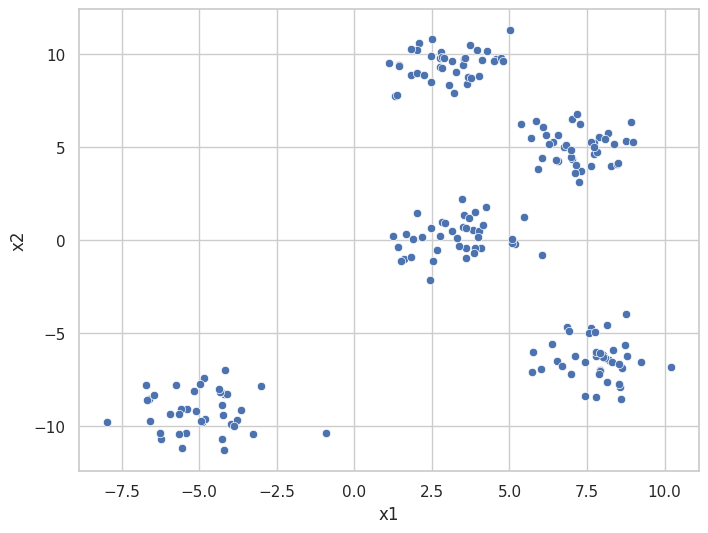

In [ ]:
X, Y = make_blobs(n_samples=200, centers=no_clusters,
                  n_features=2, random_state=18)
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:,0], y=X[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## K-means clustering training

In the code below, we train k-means clustering model using scikit-learn library. We do it for several different numbers of clusters, to find optimum numbers of center points that minimize the inertia of the model.

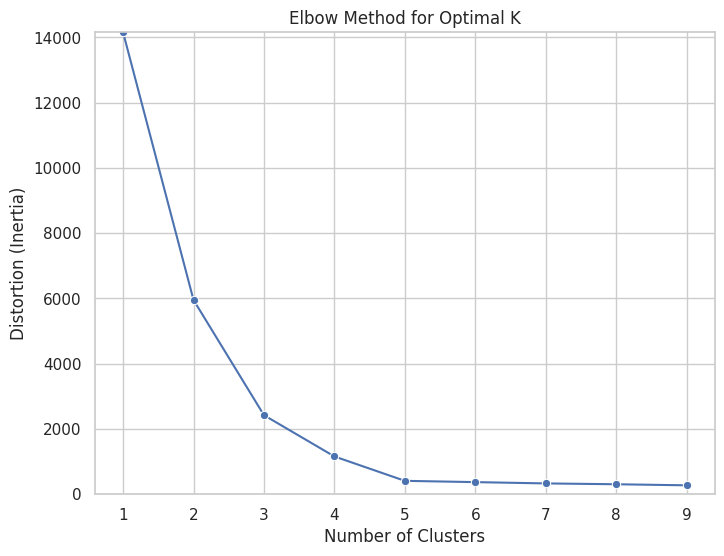

In [ ]:
cluster_range = range(1, no_clusters * 2)
distortions = []
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
sns.lineplot(x=cluster_range, y=distortions, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Inertia)')
plt.ylim(0, max(distortions))
plt.xticks(range(1, max(cluster_range) + 1))
plt.show();

## Cluster visualization

You can select the value of `optimal_k` to see the clustering graph. You can select any integer value here.

In [ ]:
optimal_k = 5

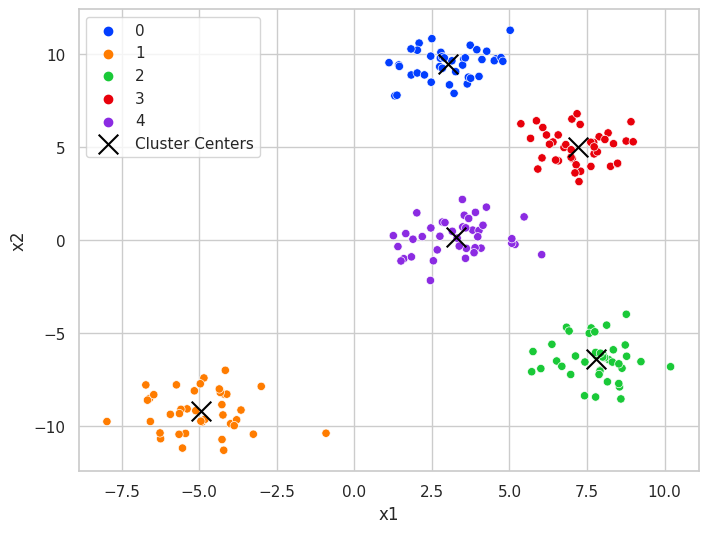

In [ ]:
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init=10)
kmeans.fit(X)
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
scatterplot = sns.scatterplot(x=X[:,0], y=X[:,1],
                              hue=kmeans.labels_, palette='bright',
                              legend='full')
plt.xlabel('x1')
plt.ylabel('x2')
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
            s=200, c='black', marker='x', label='Cluster Centers')
plt.legend()
plt.show();

## Plotting blobs for different numbers of centers

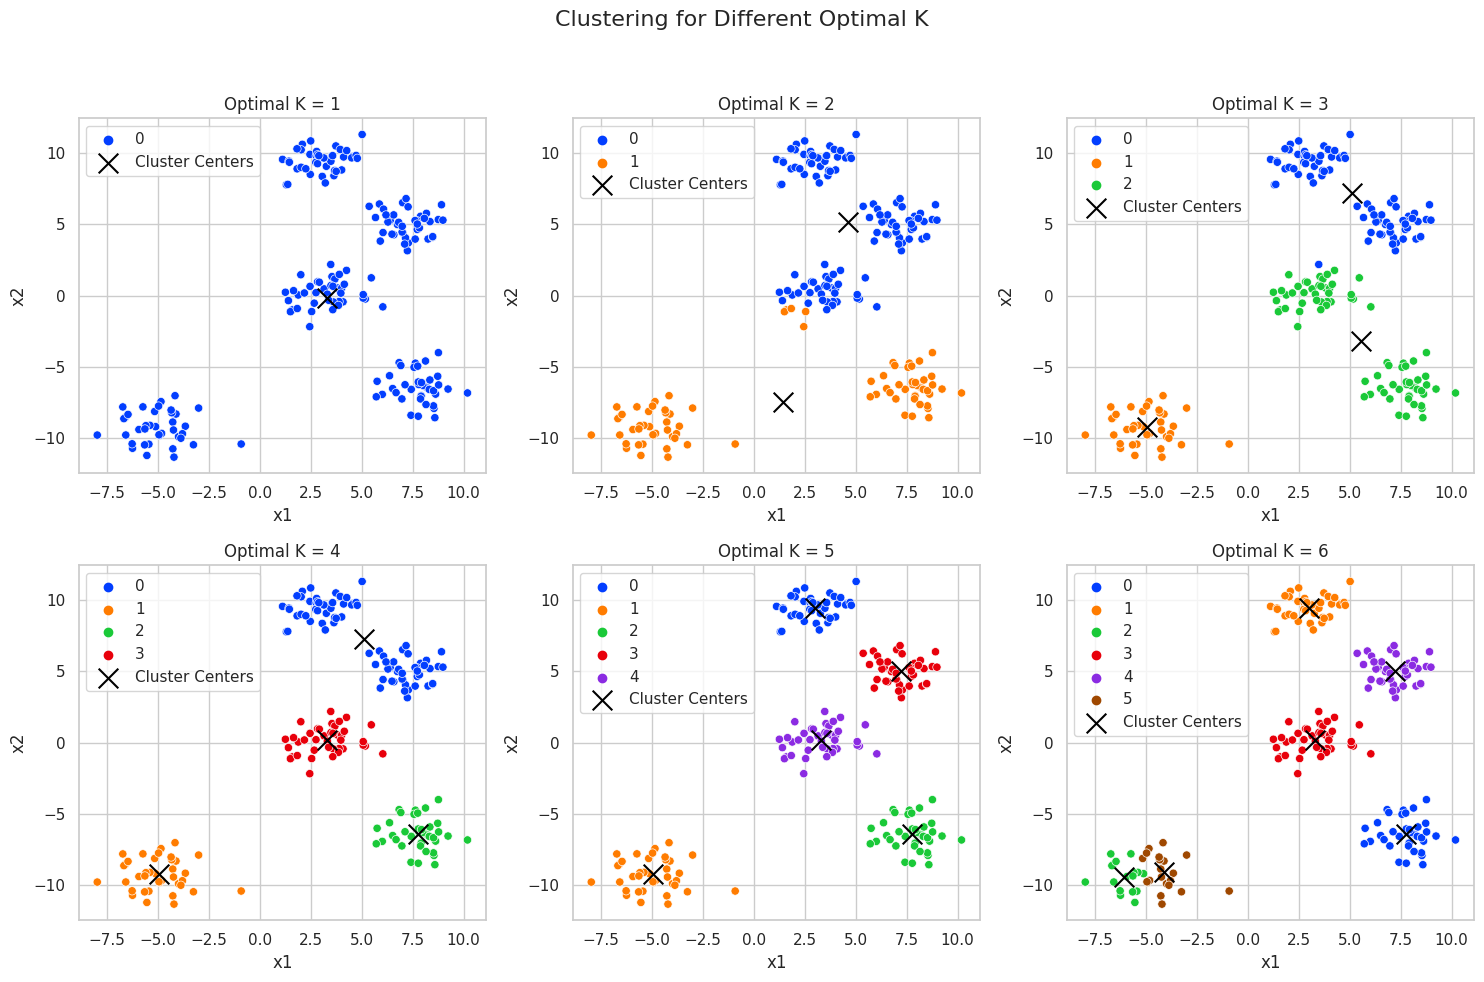

In [ ]:
k_values = [i for i in range(1,no_clusters + 2)]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Clustering for Different Optimal K', fontsize=16)

for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X)
    ax = axes[i // 3, i % 3]
    sns.set(style='whitegrid')
    scatterplot = sns.scatterplot(x=X[:,0], y=X[:,1],
                                  hue=kmeans.labels_, palette='bright',
                                  legend='full', ax=ax)
    ax.set_title(f'Optimal K = {k}')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    cluster_centers = kmeans.cluster_centers_
    ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
               s=200, c='black', marker='x', label='Cluster Centers')
    ax.legend()
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show();